# Assignment 2 for MQB7046: Modelling Public Health Data
Name: Chin Wei Hong </br>
Matrix Number: 22110451 </br>

__Question:__

Data were collected for 1,200 men and women in a study on mental health. In this cross-sectional study, all participants were asked a series of 20 questions about depressive symptoms, and a sum score of depressive symptoms was constructed.All other variables were also collected during interviews in the participants’ homes.The dataset consists of the following information:

|Variable|Coding|
|:------:|:----:|
|age|age in years|
|sex|sex: 1:"male", 2:"female"|
|educ|education: 1:"primary", 2:"vocational", 3:"secondary", 4:"university"|
|married|marital status: 0:"married", 1:"unmarried"|
|deprivation|material deprivation: 1:"yes", 0:"no"|
|bmi|body mass index in kg/m2|
|sbp|systolic blood pressure in mmHg|
|alcohol|problem drinking: 1:"yes", 0:"no"|
|smoke|current smoking: 1:"yes", 0:"no"|
|depscore|depression score: score range from 0 - 60|

Score of depressive symptoms (CES-D score) was constructed from 20 questions. The answers for each question are on a scale of 0-3, and the overall score ranges from 0-60. Score 0 means no depressive symptoms, score 60 means high score of depressive symptoms. Based on evidence from previous studies in various populations, respondents can be categorised into the following groups: </br>
a) not depressed (0–9 points), </br>
b) mildly depressed (10–15 points), </br>
c) moderately depressed (16–24 points), or </br>
d) severely depressed (more than 25 points). 

In other studies, a score of less than 16 indicates no depression, 16 and more indicates a clinically relevant depression.
The investigators are interested in the relationship between material deprivation of individuals and depression. It has been hypothesized that people who are more deprived are more likely to develop depression/more depressive symptoms than people in better material circumstances.
***
#### Instruction
Perform any relevant analyses and write a report that describe your analysis steps and summarise your findings.
1. State the related research question, objective and hypothesis based on the information provided above.
2. Summarise all variables available in the dataset.
3. Based on the information provided in (1), perform any required analyses to facilitate drawing relevant conclusions. Undertake any necessary data cleaning and preprocessing as needed. Use appropriate statistical methods or techniques and specify any assumptions necessary for the analysis. If warranted, provide justification for the chosen approach.
    1. Decide how you would like to analyse your dependent variable (continuous or categorical).
    2. Evaluate the association between possible risk factors and depression using non-regression and regression analysis.
    3. Also decide what variables that you need to consider as possible confounders or effect modifiers? If yes/no, provide your justifications
    4. Perform any additional analysis required to test these assumptions.
4. Summarise your results in appropriate tabular format and comment on your findings. State your conclusion.

# Answer
## Research Questions
1. Is there any relationship between depression score and material deprivation.
2. Is there any relationship between depression score and other independent variables, age, sex, educ, married, bmi, sbp, alcohol and smoke.

## Research objective
1. To identify relationship between depression score and material deprivation.
2. To identify relationship between depression score and other independent variables, age, sex, educ, married, bmi, sbp, alcohol and smoke.

## Hypothesis
1. There is no relationship between depression score and material deprivation.
2. There is no relationship between depression score and other independent variables, age, sex, educ, married, bmi, sbp, alcohol and smoke.

In [1]:
# To allow own package to be imported
import sys
import os
if os.path.dirname(os.getcwd()) not in sys.path:
    sys.path.append(os.path.dirname(os.getcwd()))
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

# Import packages for the assignments
import pandas as pd
import numpy as np
import wh0102 as mphd

from warnings import filterwarnings
filterwarnings(action = "ignore")

# Prepare the value information for each categorical data
data_dictionary = {
    "sex": {0:"male", 1:"female"},
    "educ":{1:"primary", 2:"vocational", 3:"secondary", 4:"university"},
    "married":{0:"married", 1:"unmarried"},
    "deprivation":{1:"yes", 0:"no"},
    "alcohol":{1:"yes", 0:"no"},
    "smoke":{1:"yes", 0:"no"},
}

# To get final data dictionary
final_data_dictionary = {
    "sex": {0:"male", 1:"female"},
    "educ":{1:"primary", 2:"vocational", 3:"secondary", 4:"university"},
    "married":{0:"married individual", 1:"unmarried individual"},
    "deprivation":{1:"individual having material deprivation", 0:"individual no material deprivation"},
    "alcohol":{1:"alcohol drinker", 0:"non-alcohol drinking"},
    "smoke":{1:"smoker", 0:"non-smokers"},
    "age_cat":{0:"age <= 60", 1:"age > 60"},
    "bmi_cat":{0:"normal BMI", 1:"overweight"},
    "sbp_cat":{1:"normal SBP", 0:"hypertensive"},
    "educ_cat":{0:"individaul who did not attend university", 1:"individual who attended university"},
    "dep_cat_2":{0:"no depression", 1:"clinically relevant depression"},
    "dep_cat_4":{0:"no_depression", 1:"mild_depress", 2:"moderate_depress", 3:"severe_depress"}
}

# Prepare the depression score categorical information with {type:[[bins], [lables]]}
# Bins including 0 as the lowest score for depscore = 0, which is not missing in nature
depscore_category = {"dep_cat_2":[[-1, 16, np.inf], ["no_depression", "clinically_relevant_depression"]],
                     "dep_cat_4":[[-1, 10, 16, 25, np.inf], ["no_depression", "mild_depress", "moderate_depress", "severe_depress"]]}
depscore_dictionary = {"dep_cat_2": {0: "no_depression", 1: "clinically_relevant_depression"},
                       "dep_cat_4": {0: "no_depression", 1: "mild_depress", 2: "moderate_depress", 3: "severe_depress"}}

# Load the dataset
df = pd.read_csv("connass2.csv")

print("Display the information of the dataframe")
print(df.info())

# Prepare the columns information
continous_data_columns = ["age", "bmi", "sbp", "depscore"]
initial_data_columns = df.columns
independent_variables_columns = [column for column in df.columns if column != "depscore"]
dependent_variable = ["depscore", "dep_cat_2", "dep_cat_4",]

# To associate the category first
for key, value in depscore_category.items():
    df.loc[:,key] = pd.cut(df.loc[:,"depscore"], bins = value[0], labels = value[1])

# Restructure the sex for 0 is male, 1 is female
df.loc[:,"sex"] = df.loc[:,"sex"] - 1

# To display the header of the dataframe
# print(df.head().to_markdown(tablefmt = "pretty", index = False))

Display the information of the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1203 non-null   float64
 1   sex          1203 non-null   int64  
 2   depscore     1203 non-null   int64  
 3   educ         1203 non-null   int64  
 4   deprivation  1203 non-null   int64  
 5   bmi          1193 non-null   float64
 6   sbp          1198 non-null   float64
 7   alcohol      1203 non-null   int64  
 8   smoke        1203 non-null   int64  
 9   married      1203 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 94.1 KB
None


## Deal with missing data

In [2]:
# Deal with missing data
missing_df = mphd.missing_values.analyse_missing_row(df)
print("Details of the missing values in the dataframe")
print(missing_df.to_markdown(tablefmt = "pretty"))

Missing data detected for columns bmi, sbp.
Summary of the missing values from the dataframe =
+------------------------------+-------+--------------------+
|                              | count | missing_percentage |
+------------------------------+-------+--------------------+
|             bmi              | 10.0  |        0.83        |
|             sbp              |  5.0  |        0.42        |
| All_rows_with_missing_values | 14.0  |        1.16        |
+------------------------------+-------+--------------------+
Details of the missing values in the dataframe
+------+-------+-----+----------+------+-------------+-------+--------+---------+-------+---------+--------------------------------+----------------+
|      |  age  | sex | depscore | educ | deprivation |  bmi  |  sbp   | alcohol | smoke | married |           dep_cat_2            |   dep_cat_4    |
+------+-------+-----+----------+------+-------------+-------+--------+---------+-------+---------+-------------------------

__intepretation__: </br>
since the bmi and sbp missing seems to be not missing at random except material deprivation all no, higher education, however, due to total row of missing = 1.16%, all the data above will be dropped for complete case analysis

In [3]:
# Convert the dataframe for easier descriptive analysis
data = mphd.categorical_data.reverse_encode(df, json_dict=data_dictionary)

The column of sex is having 1 (0.08%) rows more 1 unique value than what {0: 'male', 1: 'female'}:
+-----+------+-----+----------+------+-------------+-------+--------+---------+-------+---------+---------------+---------------+
|     | age  | sex | depscore | educ | deprivation |  bmi  |  sbp   | alcohol | smoke | married |   dep_cat_2   |   dep_cat_4   |
+-----+------+-----+----------+------+-------------+-------+--------+---------+-------+---------+---------------+---------------+
| 531 | 52.7 |  4  |    3     |  2   |      1      | 22.14 | 111.33 |    1    |   0   |    0    | no_depression | no_depression |
+-----+------+-----+----------+------+-------------+-------+--------+---------+-------+---------+---------------+---------------+


__intepretation__:
since only 1 row (0.08%) is affected and the sex = 4 most likely due to missing at random/ wrongly key in, therefore it is safe for us to discard the row of sex == 5 </br>

with total of 0.08% + 1.16% = 1.24% or 15 rows of data will be dropped

## Check for normal distribution for continous type of data

+-----------------+--------+----------+--------+--------+
|                 |  age   | depscore |  bmi   |  sbp   |
+-----------------+--------+----------+--------+--------+
|      count      | 1188.0 |  1188.0  | 1188.0 | 1188.0 |
|      mean       | 57.93  |  12.13   | 27.38  | 146.21 |
|       std       |  4.43  |   7.88   |  4.73  | 21.74  |
|       min       | 50.02  |   0.0    | 15.22  | 99.33  |
|       25%       | 53.88  |   7.0    |  24.1  | 129.33 |
|       50%       | 58.96  |   11.0   | 26.97  | 144.67 |
|       75%       | 61.49  |   15.0   |  30.3  | 160.67 |
|       max       | 69.49  |   60.0   | 47.18  | 217.33 |
|       var       |  19.6  |  62.11   | 22.38  | 472.41 |
|      skew       | -0.22  |   1.61   |  0.55  |  0.42  |
|    kurtosis     | -1.08  |   4.7    |  0.44  | -0.29  |
|     shapiro     |  0.95  |   0.89   |  0.98  |  0.98  |
| shapiro_p_value |  0.0   |   0.0    |  0.0   |  0.0   |
+-----------------+--------+----------+--------+--------+
Plotting graph

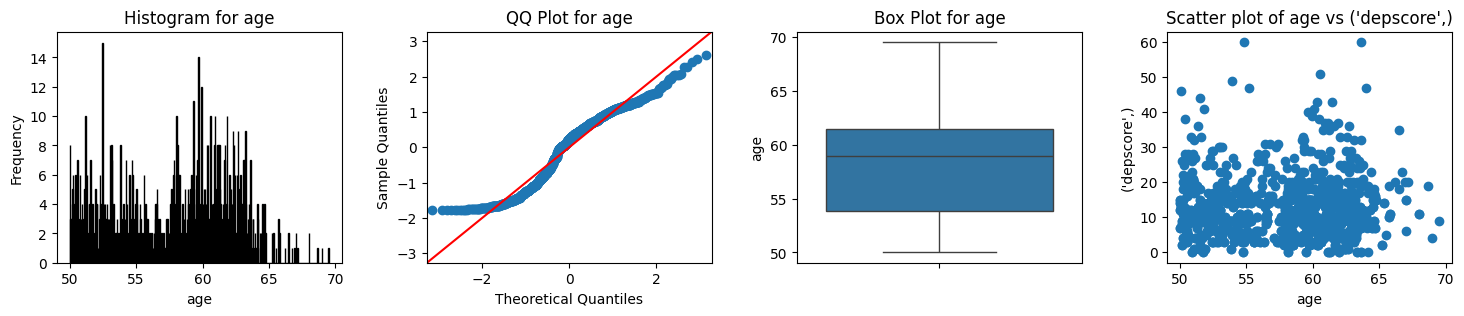

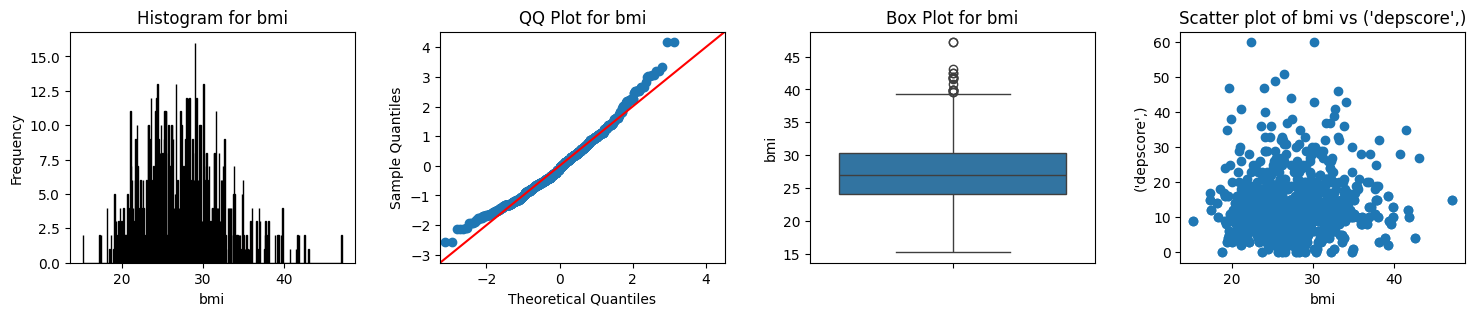

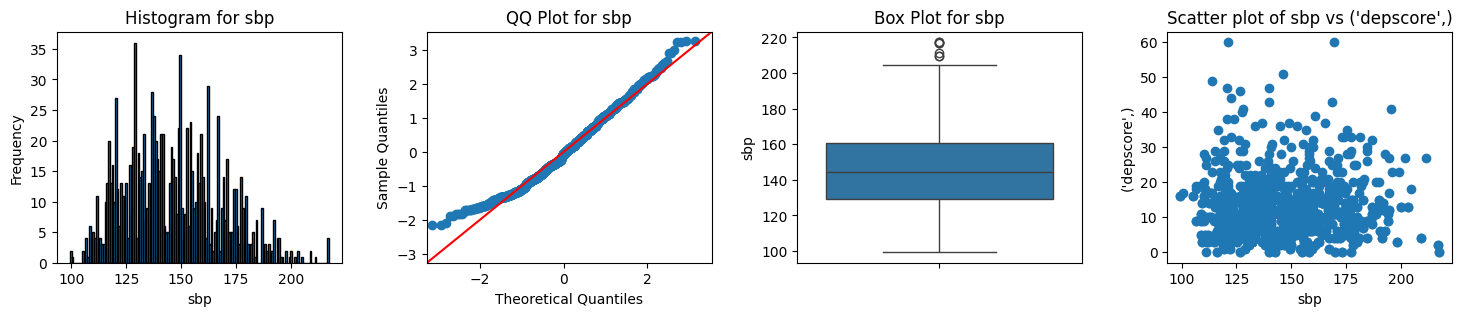

Plotting graphs for dependent variables


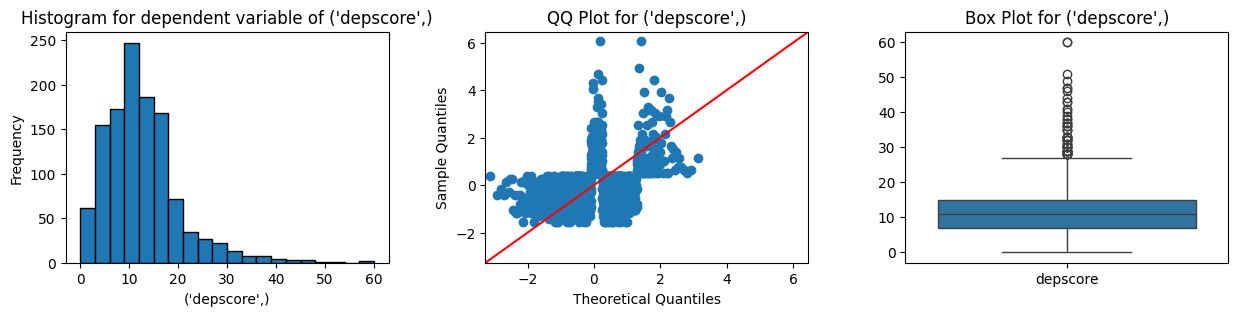

Plotting correlation matrix


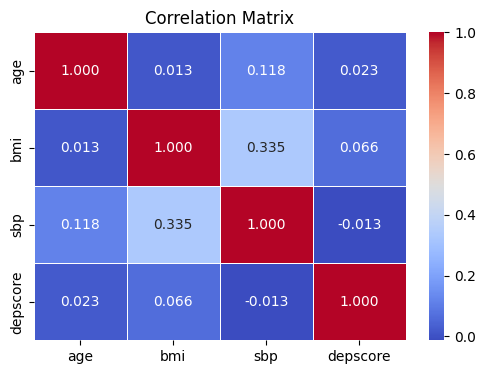

In [4]:
# Check for duplication
# duplicated_df, to_drop_duplicated_df = mphd.pre_processing.check_duplication(df, round_value = 2)

# Drop the row that contain sex == 5 & dropna
df = df.query("sex != 4").dropna()
data = data.query("sex != 4").dropna()

# Label Encode the df
df = mphd.categorical_data.label_encode(df = df, columns = list(depscore_category.keys()), convert_numeric=True)

# Continous data descriptive analysis
normal_distribution_list, abnormal_distribution_list = mphd.continous_data.descriptive_analysis(df = data,
                                                                                                independent_variables = continous_data_columns[0:3],
                                                                                                dependent_variables = continous_data_columns[3],
                                                                                                plot_dependent_variables = True,
                                                                                                plot_correlation = True)

__interpretation__: </br>
The histogram and QQ plot of all independent variables of age, bmi, sbp is not normally distributed, and their scatter plot against depression score show no linear relataionship. The correlation matrix shows all the independent variables with continous data shows low correlation with dependent variable of depscore, therefore it might viloate the assumption of linear regression

# Analyse the categocial data

To change the continous variable into categorical type
Age separated by 60 as more than 60 is geriatric

Values based on Malaysia CPG guideline management of obesity for BMI
https://www.moh.gov.my/moh/resources/Penerbitan/CPG/Endocrine/CPG_Management_of_Obesity_(Second_Edition)_2023.pdf
if bmi >= 37.5:
    bmi_category = "Severely Obese"
elif bmi >= 32.5:
    bmi_category = "Moderately Obese"
elif bmi >= 27.5:
    bmi_category = "Obese"
elif bmi >= 23.0:
    bmi_category = "Overweight"
elif bmi >= 18.5:
    bmi_category = "Normal Weight"
else:
    bmi_category = "Underweight"
But in order for better interpretation of logistic regression, a binary value of normal weight for those BMI less than 23 and BMI more than 23 will be classified into obese group.

Systolic Blood Pressure
Separate with 140, indicating either hypertensive or nots
Education initially {"educ":{1:"primary", 2:"vocational", 3:"secondary", 4:"university"}} will be converted to 2 categories only due to unable to show more than 2 category in logit
Where 1,2,3 will be group together as no_university while 4 remain

Analysis for categorical idnependent variable with continous category of depression score
Descriptive Analysis for independent variables:
+--------+--------+------------+
|  sex   | count  | percentage |
+--------+--------+------------+
| female | 564.0  |   47.47    |
|  male  | 624.0  |   52.53    |
|  All   | 1188.0 |   100.0    |
+--------+--------+------------+


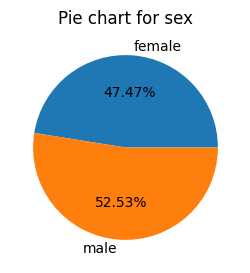

Independent t test between sex and depscore have t statistics value = 7.04 and p_value of 0.00
----------------------------------------------------------------
+-----------+--------+------------+
|  married  | count  | percentage |
+-----------+--------+------------+
|  married  | 910.0  |    76.6    |
| unmarried | 278.0  |    23.4    |
|    All    | 1188.0 |   100.0    |
+-----------+--------+------------+


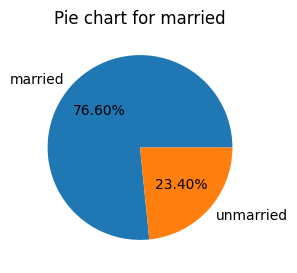

Independent t test between married and depscore have t statistics value = -5.09 and p_value of 0.00
----------------------------------------------------------------
+-------------+--------+------------+
| deprivation | count  | percentage |
+-------------+--------+------------+
|     no      | 975.0  |   82.07    |
|     yes     | 213.0  |   17.93    |
|     All     | 1188.0 |   100.0    |
+-------------+--------+------------+


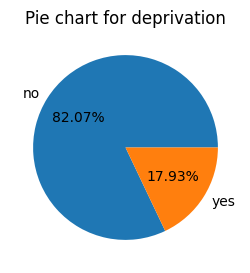

Independent t test between deprivation and depscore have t statistics value = -8.65 and p_value of 0.00
----------------------------------------------------------------
+---------+--------+------------+
| alcohol | count  | percentage |
+---------+--------+------------+
|   no    | 943.0  |   79.38    |
|   yes   | 245.0  |   20.62    |
|   All   | 1188.0 |   100.0    |
+---------+--------+------------+


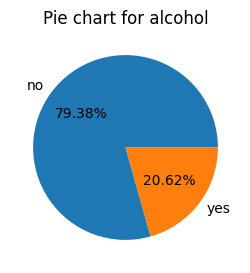

Independent t test between alcohol and depscore have t statistics value = -2.56 and p_value of 0.01
----------------------------------------------------------------
+-------+--------+------------+
| smoke | count  | percentage |
+-------+--------+------------+
|  no   | 941.0  |   79.21    |
|  yes  | 247.0  |   20.79    |
|  All  | 1188.0 |   100.0    |
+-------+--------+------------+


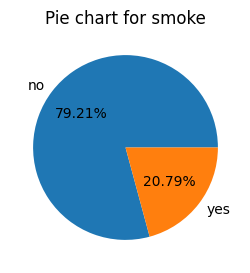

Independent t test between smoke and depscore have t statistics value = 0.09 and p_value of 0.93
----------------------------------------------------------------
+---------+--------+------------+
| age_cat | count  | percentage |
+---------+--------+------------+
|  <=60   | 712.0  |   59.93    |
|   >60   | 476.0  |   40.07    |
|   All   | 1188.0 |   100.0    |
+---------+--------+------------+


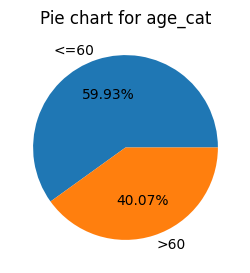

Independent t test between age_cat and depscore have t statistics value = -1.18 and p_value of 0.24
----------------------------------------------------------------
+------------+--------+------------+
|  bmi_cat   | count  | percentage |
+------------+--------+------------+
| normal_bmi | 204.0  |   17.17    |
| overweight | 984.0  |   82.83    |
|    All     | 1188.0 |   100.0    |
+------------+--------+------------+


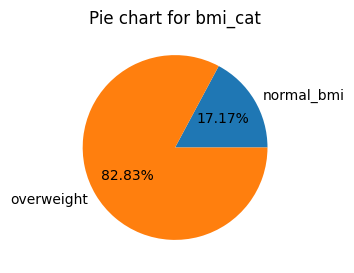

Independent t test between bmi_cat and depscore have t statistics value = 0.80 and p_value of 0.42
----------------------------------------------------------------
+--------------+--------+------------+
|   sbp_cat    | count  | percentage |
+--------------+--------+------------+
|  normal_bp   | 529.0  |   44.53    |
| hypertensive | 659.0  |   55.47    |
|     All      | 1188.0 |   100.0    |
+--------------+--------+------------+


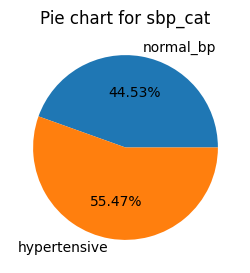

Independent t test between sbp_cat and depscore have t statistics value = -0.83 and p_value of 0.41
----------------------------------------------------------------
+---------------+--------+------------+
|   educ_cat    | count  | percentage |
+---------------+--------+------------+
| no_university | 824.0  |   69.36    |
|  university   | 364.0  |   30.64    |
|      All      | 1188.0 |   100.0    |
+---------------+--------+------------+


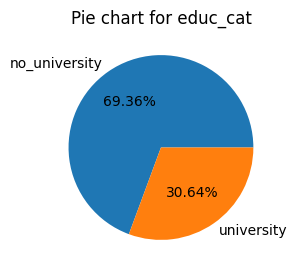

Independent t test between educ_cat and depscore have t statistics value = 0.14 and p_value of 0.89
----------------------------------------------------------------
The summary of the statistical tests for independent variable:
+---+----------------------+--------------------+------------------+----------+
|   | independent_variable |     test_name      | statistic_values | p_values |
+---+----------------------+--------------------+------------------+----------+
| 0 |         sex          | Independent_t_test |       7.04       |   0.0    |
| 1 |       married        | Independent_t_test |      -5.09       |   0.0    |
| 2 |     deprivation      | Independent_t_test |      -8.65       |   0.0    |
| 3 |       alcohol        | Independent_t_test |      -2.56       |   0.01   |
| 4 |        smoke         | Independent_t_test |       0.09       |   0.93   |
| 5 |       age_cat        | Independent_t_test |      -1.18       |   0.24   |
| 6 |       bmi_cat        | Independent_t_test |   

In [5]:
# Convet the education into binary
for key, value in data_dictionary["educ"].items():
    if key != 4:
        data.loc[data.loc[:,"educ"] == value, "educ_cat"] = "no_university"
        df.loc[df.loc[:,"educ"] == key, "educ_cat"] = 0
    else:
        data.loc[data.loc[:,"educ"] == value, "educ_cat"] = "university"
        df.loc[df.loc[:,"educ"] == key, "educ_cat"] = 1

# Prepare the dictionary along with bins and labels in name and labels in numerical that need to be use with pd.cut
categorize_continous_dictionary = {"age":[[0, 60, np.inf], ["<=60", ">60"]],
                                   "bmi":[[0, 23, np.inf], ["normal_bmi", "overweight"]],
                                   "sbp":[[0, 140, np.inf], ["normal_bp", "hypertensive"]]}

# Apply the categorizationa of continous data in the data
for key, value in categorize_continous_dictionary.items():
    data.loc[:,f"{key}_cat"] = pd.cut(data.loc[:,key], bins = value[0], labels = value[1])
    df.loc[:,f"{key}_cat"] = pd.cut(df.loc[:,key], bins = value[0], labels = value[1])

# Prepare the value changed columns for the labelencode
continous_categorical_columns = [f"{column}_cat" for column in categorize_continous_dictionary.keys()] + ["educ_cat",]

# Perform teh label encode for df.
df = mphd.categorical_data.label_encode(df = df, columns = continous_categorical_columns + ["dep_cat_2", "dep_cat_4",], convert_numeric=True)

# To prepare the independent columns for all categorical data
categorical_independent_columns = [column for column in list(data_dictionary.keys()) if column != "educ"] + continous_categorical_columns

# Descriptive Analysis on categorical data
print("Analysis for categorical idnependent variable with continous category of depression score")
con_statistic_table = mphd.categorical_data.categorical_descriptive_analysis(data,
                                                                              independent_variables = categorical_independent_columns, 
                                                                              dependent_variables = dependent_variable[0])

Analysis for categorical idnependent variable with 4 different category of depression score
Descriptive Analysis for independent variables:
+--------+---------------+--------------+------------------+----------------+--------+------------+
|  sex   | no_depression | mild_depress | moderate_depress | severe_depress |  All   | percentage |
+--------+---------------+--------------+------------------+----------------+--------+------------+
| female |     231.0     |    183.0     |       93.0       |      57.0      | 564.0  |   47.47    |
|  male  |     331.0     |    217.0     |       59.0       |      17.0      | 624.0  |   52.53    |
|  All   |     562.0     |    400.0     |      152.0       |      74.0      | 1188.0 |   100.0    |
+--------+---------------+--------------+------------------+----------------+--------+------------+


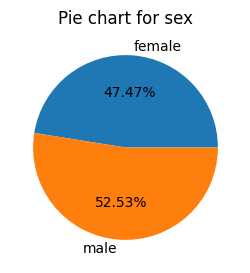

Chi2 test between sex and dep_cat_4 have chi2 statistics value = 47.00 and p_value of 0.00
----------------------------------------------------------------
+-----------+---------------+--------------+------------------+----------------+--------+------------+
|  married  | no_depression | mild_depress | moderate_depress | severe_depress |  All   | percentage |
+-----------+---------------+--------------+------------------+----------------+--------+------------+
|  married  |     451.0     |    312.0     |      107.0       |      40.0      | 910.0  |    76.6    |
| unmarried |     111.0     |     88.0     |       45.0       |      34.0      | 278.0  |    23.4    |
|    All    |     562.0     |    400.0     |      152.0       |      74.0      | 1188.0 |   100.0    |
+-----------+---------------+--------------+------------------+----------------+--------+------------+


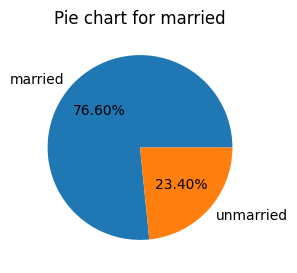

Chi2 test between married and dep_cat_4 have chi2 statistics value = 28.86 and p_value of 0.00
----------------------------------------------------------------
+-------------+---------------+--------------+------------------+----------------+--------+------------+
| deprivation | no_depression | mild_depress | moderate_depress | severe_depress |  All   | percentage |
+-------------+---------------+--------------+------------------+----------------+--------+------------+
|     no      |     491.0     |    342.0     |      104.0       |      38.0      | 975.0  |   82.07    |
|     yes     |     71.0      |     58.0     |       48.0       |      36.0      | 213.0  |   17.93    |
|     All     |     562.0     |    400.0     |      152.0       |      74.0      | 1188.0 |   100.0    |
+-------------+---------------+--------------+------------------+----------------+--------+------------+


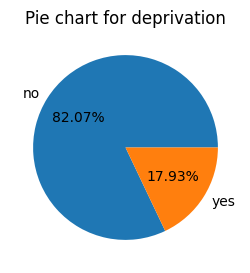

Chi2 test between deprivation and dep_cat_4 have chi2 statistics value = 80.61 and p_value of 0.00
----------------------------------------------------------------
+---------+---------------+--------------+------------------+----------------+--------+------------+
| alcohol | no_depression | mild_depress | moderate_depress | severe_depress |  All   | percentage |
+---------+---------------+--------------+------------------+----------------+--------+------------+
|   no    |     461.0     |    320.0     |      107.0       |      55.0      | 943.0  |   79.38    |
|   yes   |     101.0     |     80.0     |       45.0       |      19.0      | 245.0  |   20.62    |
|   All   |     562.0     |    400.0     |      152.0       |      74.0      | 1188.0 |   100.0    |
+---------+---------------+--------------+------------------+----------------+--------+------------+


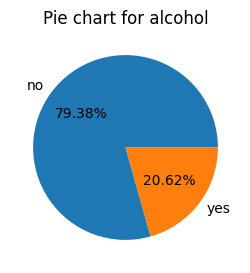

Chi2 test between alcohol and dep_cat_4 have chi2 statistics value = 11.15 and p_value of 0.01
----------------------------------------------------------------
+-------+---------------+--------------+------------------+----------------+--------+------------+
| smoke | no_depression | mild_depress | moderate_depress | severe_depress |  All   | percentage |
+-------+---------------+--------------+------------------+----------------+--------+------------+
|  no   |     439.0     |    326.0     |      121.0       |      55.0      | 941.0  |   79.21    |
|  yes  |     123.0     |     74.0     |       31.0       |      19.0      | 247.0  |   20.79    |
|  All  |     562.0     |    400.0     |      152.0       |      74.0      | 1188.0 |   100.0    |
+-------+---------------+--------------+------------------+----------------+--------+------------+


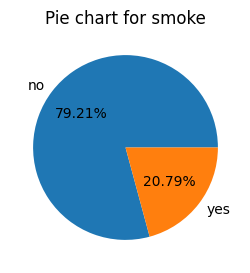

Chi2 test between smoke and dep_cat_4 have chi2 statistics value = 2.77 and p_value of 0.43
----------------------------------------------------------------
+---------+---------------+--------------+------------------+----------------+--------+------------+
| age_cat | no_depression | mild_depress | moderate_depress | severe_depress |  All   | percentage |
+---------+---------------+--------------+------------------+----------------+--------+------------+
|  <=60   |     348.0     |    235.0     |       84.0       |      45.0      | 712.0  |   59.93    |
|   >60   |     214.0     |    165.0     |       68.0       |      29.0      | 476.0  |   40.07    |
|   All   |     562.0     |    400.0     |      152.0       |      74.0      | 1188.0 |   100.0    |
+---------+---------------+--------------+------------------+----------------+--------+------------+


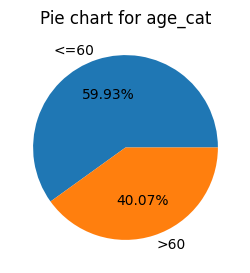

Chi2 test between age_cat and dep_cat_4 have chi2 statistics value = 2.56 and p_value of 0.46
----------------------------------------------------------------
+------------+---------------+--------------+------------------+----------------+--------+------------+
|  bmi_cat   | no_depression | mild_depress | moderate_depress | severe_depress |  All   | percentage |
+------------+---------------+--------------+------------------+----------------+--------+------------+
| normal_bmi |     101.0     |     72.0     |       22.0       |      9.0       | 204.0  |   17.17    |
| overweight |     461.0     |    328.0     |      130.0       |      65.0      | 984.0  |   82.83    |
|    All     |     562.0     |    400.0     |      152.0       |      74.0      | 1188.0 |   100.0    |
+------------+---------------+--------------+------------------+----------------+--------+------------+


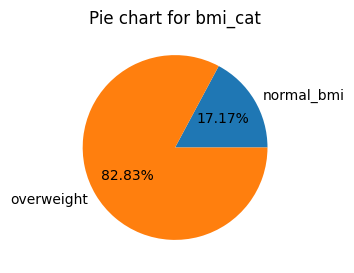

Chi2 test between bmi_cat and dep_cat_4 have chi2 statistics value = 2.53 and p_value of 0.47
----------------------------------------------------------------
+--------------+---------------+--------------+------------------+----------------+--------+------------+
|   sbp_cat    | no_depression | mild_depress | moderate_depress | severe_depress |  All   | percentage |
+--------------+---------------+--------------+------------------+----------------+--------+------------+
|  normal_bp   |     251.0     |    175.0     |       72.0       |      31.0      | 529.0  |   44.53    |
| hypertensive |     311.0     |    225.0     |       80.0       |      43.0      | 659.0  |   55.47    |
|     All      |     562.0     |    400.0     |      152.0       |      74.0      | 1188.0 |   100.0    |
+--------------+---------------+--------------+------------------+----------------+--------+------------+


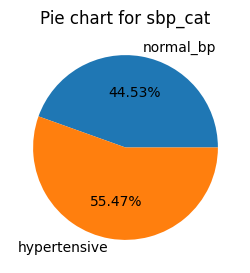

Chi2 test between sbp_cat and dep_cat_4 have chi2 statistics value = 0.81 and p_value of 0.85
----------------------------------------------------------------
+---------------+---------------+--------------+------------------+----------------+--------+------------+
|   educ_cat    | no_depression | mild_depress | moderate_depress | severe_depress |  All   | percentage |
+---------------+---------------+--------------+------------------+----------------+--------+------------+
| no_university |     391.0     |    281.0     |       99.0       |      53.0      | 824.0  |   69.36    |
|  university   |     171.0     |    119.0     |       53.0       |      21.0      | 364.0  |   30.64    |
|      All      |     562.0     |    400.0     |      152.0       |      74.0      | 1188.0 |   100.0    |
+---------------+---------------+--------------+------------------+----------------+--------+------------+


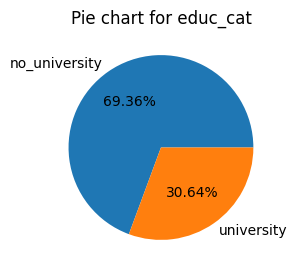

Chi2 test between educ_cat and dep_cat_4 have chi2 statistics value = 1.62 and p_value of 0.66
----------------------------------------------------------------
Descriptive Analysis for dependent variables:
+------------------+-------+
|    dep_cat_4     | count |
+------------------+-------+
|  no_depression   |  562  |
|   mild_depress   |  400  |
| moderate_depress |  152  |
|  severe_depress  |  74   |
|       All        | 1188  |
+------------------+-------+


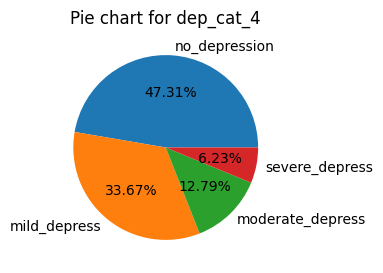

The summary of the statistical tests for independent variable:
+---+----------------------+-----------+------------------+----------+
|   | independent_variable | test_name | statistic_values | p_values |
+---+----------------------+-----------+------------------+----------+
| 0 |         sex          | Chi2 Test |       47.0       |   0.0    |
| 1 |       married        | Chi2 Test |      28.86       |   0.0    |
| 2 |     deprivation      | Chi2 Test |      80.61       |   0.0    |
| 3 |       alcohol        | Chi2 Test |      11.15       |   0.01   |
| 4 |        smoke         | Chi2 Test |       2.77       |   0.43   |
| 5 |       age_cat        | Chi2 Test |       2.56       |   0.46   |
| 6 |       bmi_cat        | Chi2 Test |       2.53       |   0.47   |
| 7 |       sbp_cat        | Chi2 Test |       0.81       |   0.85   |
| 8 |       educ_cat       | Chi2 Test |       1.62       |   0.66   |
+---+----------------------+-----------+------------------+----------+
The chi2 test 

In [6]:
# Descriptive Analysis on categorical data
print("Analysis for categorical idnependent variable with 4 different category of depression score")
dep4_statistic_table = mphd.categorical_data.categorical_descriptive_analysis(data,
                                                                              independent_variables = categorical_independent_columns, 
                                                                              dependent_variables = dependent_variable[2])

Analysis for categorical idnependent variable with 2 different category of depression score
Descriptive Analysis for independent variables:
+--------+---------------+--------------------------------+--------+------------+
|  sex   | no_depression | clinically_relevant_depression |  All   | percentage |
+--------+---------------+--------------------------------+--------+------------+
| female |     414.0     |             150.0              | 564.0  |   47.47    |
|  male  |     548.0     |              76.0              | 624.0  |   52.53    |
|  All   |     962.0     |             226.0              | 1188.0 |   100.0    |
+--------+---------------+--------------------------------+--------+------------+


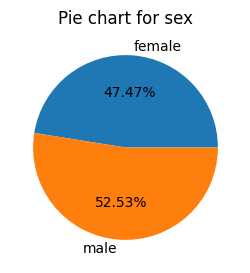

Chi2 test between sex and dep_cat_2 have chi2 statistics value = 39.04 and p_value of 0.00
----------------------------------------------------------------
+-----------+---------------+--------------------------------+--------+------------+
|  married  | no_depression | clinically_relevant_depression |  All   | percentage |
+-----------+---------------+--------------------------------+--------+------------+
|  married  |     763.0     |             147.0              | 910.0  |    76.6    |
| unmarried |     199.0     |              79.0              | 278.0  |    23.4    |
|    All    |     962.0     |             226.0              | 1188.0 |   100.0    |
+-----------+---------------+--------------------------------+--------+------------+


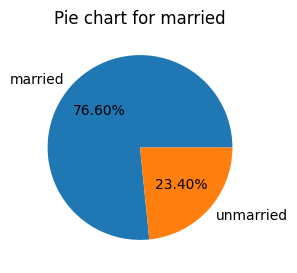

Chi2 test between married and dep_cat_2 have chi2 statistics value = 20.00 and p_value of 0.00
----------------------------------------------------------------
+-------------+---------------+--------------------------------+--------+------------+
| deprivation | no_depression | clinically_relevant_depression |  All   | percentage |
+-------------+---------------+--------------------------------+--------+------------+
|     no      |     833.0     |             142.0              | 975.0  |   82.07    |
|     yes     |     129.0     |              84.0              | 213.0  |   17.93    |
|     All     |     962.0     |             226.0              | 1188.0 |   100.0    |
+-------------+---------------+--------------------------------+--------+------------+


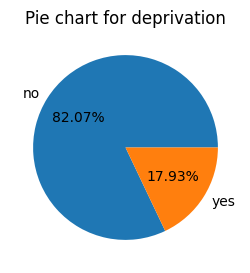

Chi2 test between deprivation and dep_cat_2 have chi2 statistics value = 68.60 and p_value of 0.00
----------------------------------------------------------------
+---------+---------------+--------------------------------+--------+------------+
| alcohol | no_depression | clinically_relevant_depression |  All   | percentage |
+---------+---------------+--------------------------------+--------+------------+
|   no    |     781.0     |             162.0              | 943.0  |   79.38    |
|   yes   |     181.0     |              64.0              | 245.0  |   20.62    |
|   All   |     962.0     |             226.0              | 1188.0 |   100.0    |
+---------+---------------+--------------------------------+--------+------------+


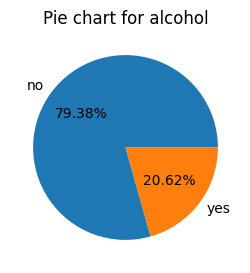

Chi2 test between alcohol and dep_cat_2 have chi2 statistics value = 9.52 and p_value of 0.00
----------------------------------------------------------------
+-------+---------------+--------------------------------+--------+------------+
| smoke | no_depression | clinically_relevant_depression |  All   | percentage |
+-------+---------------+--------------------------------+--------+------------+
|  no   |     765.0     |             176.0              | 941.0  |   79.21    |
|  yes  |     197.0     |              50.0              | 247.0  |   20.79    |
|  All  |     962.0     |             226.0              | 1188.0 |   100.0    |
+-------+---------------+--------------------------------+--------+------------+


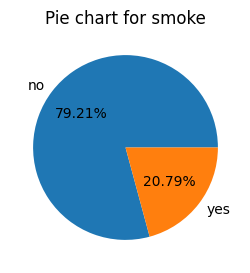

Chi2 test between smoke and dep_cat_2 have chi2 statistics value = 0.21 and p_value of 0.65
----------------------------------------------------------------
+---------+---------------+--------------------------------+--------+------------+
| age_cat | no_depression | clinically_relevant_depression |  All   | percentage |
+---------+---------------+--------------------------------+--------+------------+
|  <=60   |     583.0     |             129.0              | 712.0  |   59.93    |
|   >60   |     379.0     |              97.0              | 476.0  |   40.07    |
|   All   |     962.0     |             226.0              | 1188.0 |   100.0    |
+---------+---------------+--------------------------------+--------+------------+


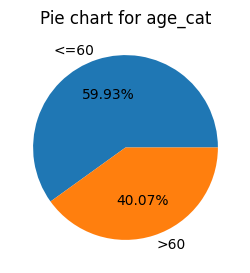

Chi2 test between age_cat and dep_cat_2 have chi2 statistics value = 0.80 and p_value of 0.37
----------------------------------------------------------------
+------------+---------------+--------------------------------+--------+------------+
|  bmi_cat   | no_depression | clinically_relevant_depression |  All   | percentage |
+------------+---------------+--------------------------------+--------+------------+
| normal_bmi |     173.0     |              31.0              | 204.0  |   17.17    |
| overweight |     789.0     |             195.0              | 984.0  |   82.83    |
|    All     |     962.0     |             226.0              | 1188.0 |   100.0    |
+------------+---------------+--------------------------------+--------+------------+


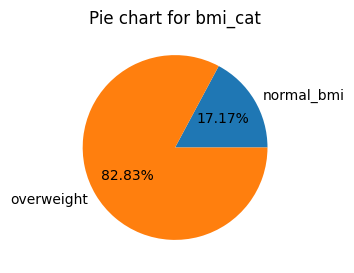

Chi2 test between bmi_cat and dep_cat_2 have chi2 statistics value = 2.05 and p_value of 0.15
----------------------------------------------------------------
+--------------+---------------+--------------------------------+--------+------------+
|   sbp_cat    | no_depression | clinically_relevant_depression |  All   | percentage |
+--------------+---------------+--------------------------------+--------+------------+
|  normal_bp   |     426.0     |             103.0              | 529.0  |   44.53    |
| hypertensive |     536.0     |             123.0              | 659.0  |   55.47    |
|     All      |     962.0     |             226.0              | 1188.0 |   100.0    |
+--------------+---------------+--------------------------------+--------+------------+


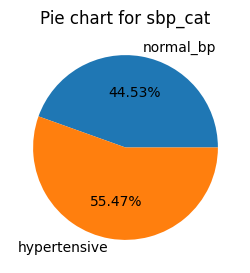

Chi2 test between sbp_cat and dep_cat_2 have chi2 statistics value = 0.08 and p_value of 0.78
----------------------------------------------------------------
+---------------+---------------+--------------------------------+--------+------------+
|   educ_cat    | no_depression | clinically_relevant_depression |  All   | percentage |
+---------------+---------------+--------------------------------+--------+------------+
| no_university |     672.0     |             152.0              | 824.0  |   69.36    |
|  university   |     290.0     |              74.0              | 364.0  |   30.64    |
|      All      |     962.0     |             226.0              | 1188.0 |   100.0    |
+---------------+---------------+--------------------------------+--------+------------+


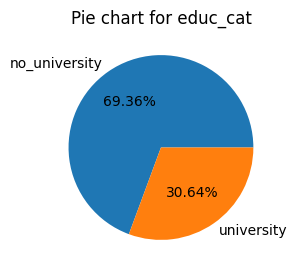

Chi2 test between educ_cat and dep_cat_2 have chi2 statistics value = 0.47 and p_value of 0.50
----------------------------------------------------------------
Descriptive Analysis for dependent variables:
+--------------------------------+-------+
|           dep_cat_2            | count |
+--------------------------------+-------+
|         no_depression          |  962  |
| clinically_relevant_depression |  226  |
|              All               | 1188  |
+--------------------------------+-------+


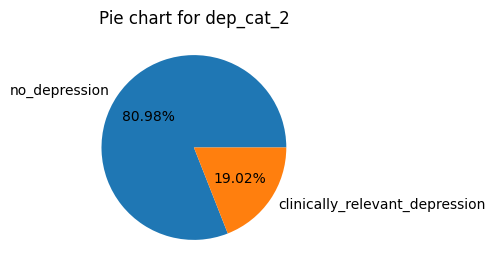

The summary of the statistical tests for independent variable:
+---+----------------------+-----------+------------------+----------+
|   | independent_variable | test_name | statistic_values | p_values |
+---+----------------------+-----------+------------------+----------+
| 0 |         sex          | Chi2 Test |      39.04       |   0.0    |
| 1 |       married        | Chi2 Test |       20.0       |   0.0    |
| 2 |     deprivation      | Chi2 Test |       68.6       |   0.0    |
| 3 |       alcohol        | Chi2 Test |       9.52       |   0.0    |
| 4 |        smoke         | Chi2 Test |       0.21       |   0.65   |
| 5 |       age_cat        | Chi2 Test |       0.8        |   0.37   |
| 6 |       bmi_cat        | Chi2 Test |       2.05       |   0.15   |
| 7 |       sbp_cat        | Chi2 Test |       0.08       |   0.78   |
| 8 |       educ_cat       | Chi2 Test |       0.47       |   0.5    |
+---+----------------------+-----------+------------------+----------+
The chi2 test 

In [7]:
# Perform the same analysis on 2 different category of depression score
print("Analysis for categorical idnependent variable with 2 different category of depression score")
dep2_statistic_table = mphd.categorical_data.categorical_descriptive_analysis(data,
                                                                              independent_variables = categorical_independent_columns, 
                                                                              dependent_variables = dependent_variable[1])

In [8]:
# Combine all the statistical summary test
print(con_statistic_table.merge(dep4_statistic_table, how = "outer", on = "independent_variable", suffixes=["_con", "_dep4"])\
                   .merge(dep2_statistic_table, how = "outer", on = "independent_variable", suffixes=["", "_dep2"]).round(4)\
                   .to_markdown(tablefmt = "pretty", index = False))

+----------------------+--------------------+----------------------+--------------+----------------+-----------------------+---------------+-----------+------------------+----------+
| independent_variable |   test_name_con    | statistic_values_con | p_values_con | test_name_dep4 | statistic_values_dep4 | p_values_dep4 | test_name | statistic_values | p_values |
+----------------------+--------------------+----------------------+--------------+----------------+-----------------------+---------------+-----------+------------------+----------+
|       age_cat        | Independent_t_test |       -1.1844        |    0.2365    |   Chi2 Test    |        2.5628         |     0.464     | Chi2 Test |      0.805       |  0.3696  |
|       alcohol        | Independent_t_test |       -2.5564        |    0.0107    |   Chi2 Test    |        11.154         |    0.0109     | Chi2 Test |      9.525       |  0.002   |
|       bmi_cat        | Independent_t_test |        0.8013        |    0.4231    |  

__interpretation__:
Among all the categorical independent variable, sex, married, deprivation, alcohol were having p value < 0.05 and is significantly associated with the depression score, regardless the depression score is in continous data type or having 2 or 4 categories.

## Building all possible regression model

In [9]:
# set acceptable p value
acceptable_p_value = 0.05

# For ordered logistic regression with 4 different depression score outcome
con_ordered_models, con_summary_ordered_models = mphd.regression.regression_list(df = df, mode = "OrderedModel", 
                                                                                 independent_variables = independent_variables_columns,
                                                                                 dependent_variables = dependent_variable[2],
                                                                                 p_value_cut_off = acceptable_p_value)
cat_ordered_models, cat_summary_ordered_models = mphd.regression.regression_list(df = df, mode = "OrderedModel", 
                                                                                 independent_variables = categorical_independent_columns,
                                                                                 dependent_variables = dependent_variable[2],
                                                                                 p_value_cut_off = acceptable_p_value)

# For Multinominal logistic regression with 4 different depression score outcome
con_multinominal_models, con_summary_multinominal_models = mphd.regression.regression_list(df = df, mode = "sm.MNLogit", 
                                                                                           independent_variables = independent_variables_columns,
                                                                                           dependent_variables = dependent_variable[2],
                                                                                           p_value_cut_off = acceptable_p_value)
cat_multinominal_models, cat_summary_multinominal_models = mphd.regression.regression_list(df = df, mode = "sm.MNLogit", 
                                                                                           independent_variables = categorical_independent_columns,
                                                                                           dependent_variables = dependent_variable[2],
                                                                                           p_value_cut_off = acceptable_p_value)

# For binominal logistic regression with 2 different depression sscore outcome along with normal dtypes of dataframe from cornass 2, age, bmi, sbp remain as continous data
con_logistic_models, con_summary_logistic_models = mphd.regression.regression_list(df = df, mode = "sm.Logit",
                                                                                   independent_variables = independent_variables_columns,
                                                                                   dependent_variables = dependent_variable[1],
                                                                                   p_value_cut_off = acceptable_p_value)
# For binominal logistic regression with 2 different depression score outcome along with all independent variable are categorized
cat_logistic_models, cat_summary_logistic_models = mphd.regression.regression_list(df = df, mode = "sm.Logit",
                                                                                   independent_variables = categorical_independent_columns,
                                                                                   dependent_variables = dependent_variable[1],
                                                                                   p_value_cut_off = acceptable_p_value)

## Analyse to get the best model

In [10]:
# Print the descriptive table for all the models
columns_to_display = ("pseudo_r_2", "log_likelihood", "llr_p_value", "aic_akaike_information_criterion", "bic_bayesin_information_criterion", "coeff_all_significant")
summary_name = ["Ordered Logistic Regression Model with Continous Data", "Ordered Logistic Regression Model with All Categorical Data",
                "Multinominal Logistic Regression Model with Continous Data", "Multinominal Logistic Regression Model with All Categorical Data",
                "Binominal Logistic Regression Model with Continous Data", "Binominal Logistic Regression Model with All Categorical Data"]
summary_list = [con_summary_ordered_models, cat_summary_ordered_models, 
                con_summary_multinominal_models, cat_summary_multinominal_models, 
                con_summary_logistic_models, cat_summary_logistic_models]
for num in range(0,6):
    print(f"Summary for {summary_name[num]}")
    print(summary_list[num].loc[:,columns_to_display].describe().round(4).to_markdown(tablefmt = "pretty"))

Summary for Ordered Logistic Regression Model with Continous Data
+-------+------------+----------------+-------------+----------------------------------+-----------------------------------+
|       | pseudo_r_2 | log_likelihood | llr_p_value | aic_akaike_information_criterion | bic_bayesin_information_criterion |
+-------+------------+----------------+-------------+----------------------------------+-----------------------------------+
| count |   511.0    |     511.0      |    511.0    |              511.0               |               511.0               |
| mean  |   0.0033   |   -1369.4994   |   0.1518    |            2754.0164             |             2792.1613             |
|  std  |   0.0014   |     1.9182     |    0.158    |              4.0104              |              9.9682               |
|  min  |    0.0     |   -1374.0378   |   0.0011    |            2743.8488             |             2766.8731             |
|  25%  |   0.0022   |   -1370.9684   |   0.0244    |      

__Intepretation__: </br>
From the 6 descriptive table above that used all the categorical data or contain continous data in ordered regression model, multinominal regression model, logistic regression model, the logistic regeression model do have lower AIC, BIC and higher Pseudo r<sup>2</sup> as compare to ordered regression and multinominal models, therefore logistic regression with 2 depression score category with all categorical independent variables will be further evaluate to find out the best model.

In [11]:
# To look for best model
short_summary = mphd.regression.analyse_model_summary(cat_summary_logistic_models.loc[:,("variables", "num_variables") + columns_to_display + 
                                                                                      ("roc", "shapiro_residual", 
                                                                                       "Lagrange_Multiplier", "Lagrange_Multiplier_p-value",
                                                                                       "F-statistic", "F-statistic_p-value")], 
                                                      top_count = 5,
                                                      parameters= {"aic_akaike_information_criterion": True,
                                                                   "bic_bayesin_information_criterion": True,
                                                                   "pseudo_r_2": False, 
                                                                   "roc":False})
short_summary.round(4)

,index,variables,num_variables,pseudo_r_2,log_likelihood,llr_p_value,aic_akaike_information_criterion,bic_bayesin_information_criterion,coeff_all_significant,roc,shapiro_residual,Lagrange_Multiplier,Lagrange_Multiplier_p-value,F-statistic,F-statistic_p-value
0,384,"sex,married,deprivation,alcohol,smoke,educ_cat",6,0.1043,-517.7635,0.0,1049.5270,1085.0872,False,0.7081,0.0,55.0717,0.0,9.5681,0.0
1,259,"sex,married,deprivation,alcohol,educ_cat",5,0.1021,-518.9998,0.0,1049.9997,1080.4798,True,0.7098,0.0,59.3441,0.0,12.4298,0.0
2,467,"sex,married,deprivation,alcohol,smoke,age_cat,...",7,0.1051,-517.2767,0.0,1050.5534,1091.1936,False,0.7051,0.0,56.0873,0.0,8.3529,0.0
3,469,"sex,married,deprivation,alcohol,smoke,bmi_cat,...",7,0.1048,-517.4719,0.0,1050.9438,1091.5841,False,0.7070,0.0,54.3616,0.0,8.0835,0.0
4,470,"sex,married,deprivation,alcohol,smoke,sbp_cat,...",7,0.1045,-517.6101,0.0,1051.2202,1091.8604,False,0.7070,0.0,55.1125,0.0,8.2006,0.0
5,52,"sex,deprivation,alcohol",3,0.0926,-524.5238,0.0,1057.0476,1077.3677,True,0.6891,0.0,59.7410,0.0,20.8975,0.0
6,154,"sex,deprivation,alcohol,educ_cat",4,0.0983,-521.2404,0.0,1052.4808,1077.8810,True,0.7030,0.0,62.9621,0.0,16.5515,0.0
7,129,"sex,married,deprivation,alcohol",4,0.0959,-522.6050,0.0,1055.2100,1080.6101,True,0.6933,0.0,55.7876,0.0,14.5725,0.0
8,150,"sex,deprivation,alcohol,smoke",4,0.0947,-523.2944,0.0,1056.5889,1081.9890,False,0.6897,0.0,54.9912,0.0,14.3544,0.0
9,510,"sex,married,deprivation,alcohol,smoke,age_cat,...",9,0.1057,-516.9549,0.0,1053.9099,1104.7101,False,0.7067,0.0,55.4531,0.0,6.4087,0.0


In [12]:
# Select the best model with explaination
best_index = 259
second_index = 154
mphd.regression.selecting_best_model(model_summary = cat_summary_logistic_models.round(4), 
                                     best_index = best_index, 
                                     mode = "logistic", 
                                     dependent_variable = "depression score")

From the summary table above, the logistic regression with variable of sex,married,deprivation,alcohol,educ_cat seems to be the best choice among all due to its AIC (1049.9997) is fairly low (lowest = 1049.527).
The BIC of the model (1080.4798) is not too far higher than the minimum among the model summary of 1077.3677.
The psedo-r2 of the model showing that 0.1021 of the depression score can be explained by the independent variable of sex,married,deprivation,alcohol,educ_cat.
The log_likelihood of -518.9998 is not too high compare to the lowest -577.9769. 
The log_likelihood p value for the model is less than 0.05 indicating the model is indicating that the full model significantly improves the fit compared to the null model.
The model is having area under the Receiver Operating Characteristic (ROC) of 0.7098, which indicate the model is good to predict the depression score based on its independent variables of sex,married,deprivation,alcohol,educ_cat.
The Lagrange_Multiplier of 59.34

## Analyse the Best Model

                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1182
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.1021
Time:                        21:20:43   Log-Likelihood:                -519.00
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                 8.013e-24
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7172      0.176     15.420      0.000       2.372       3.063
sex            -1.0207      0.182     -5.616      0.000      -1.377      -0.664
married        -0.3834      0.180     -2.134    

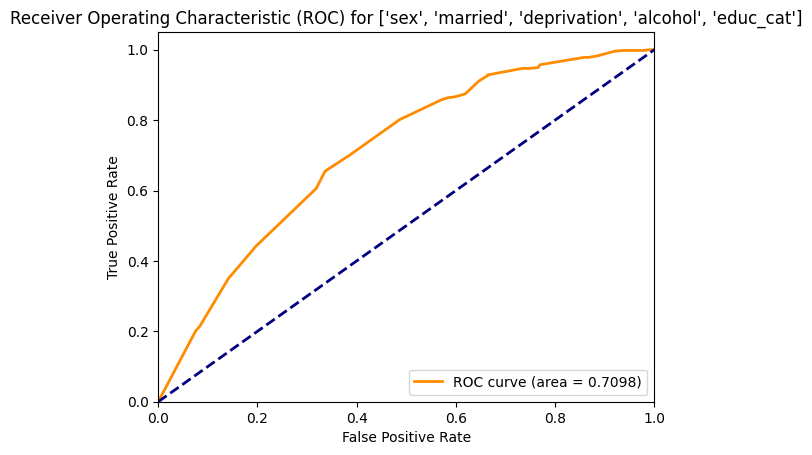

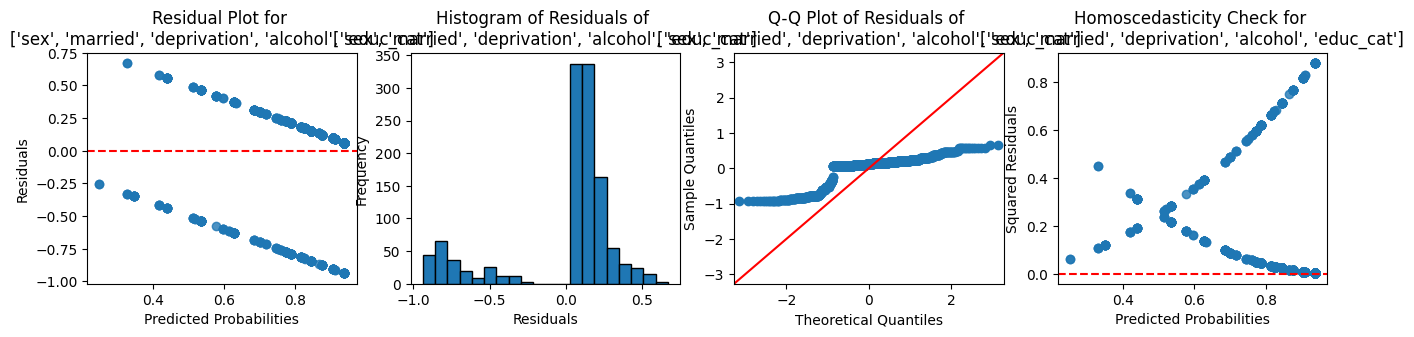

In [13]:
# To run analysis for the best model
mphd.regression.analyse_model(model = cat_logistic_models[best_index], df = df, mode = "logistic_regression",
                              dependent_variable=dependent_variable[1], round_value=4, data_dictionary=final_data_dictionary)

                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1183
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.09826
Time:                        21:20:44   Log-Likelihood:                -521.24
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                 1.244e-23
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6609      0.173     15.408      0.000       2.322       2.999
sex            -1.1256      0.174     -6.467      0.000      -1.467      -0.784
deprivation    -1.2020      0.180     -6.684    

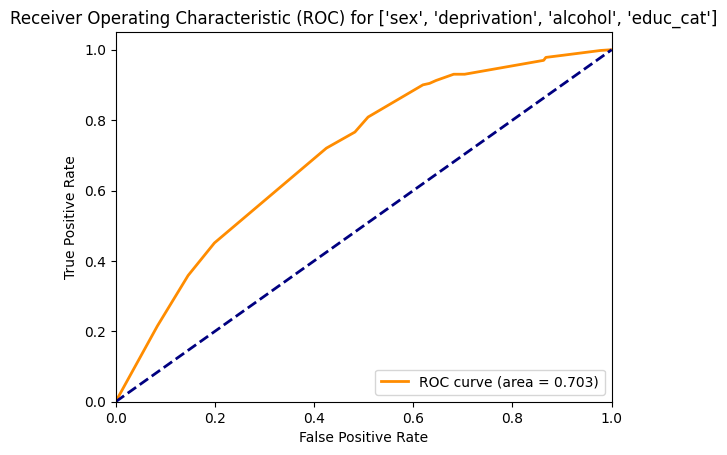

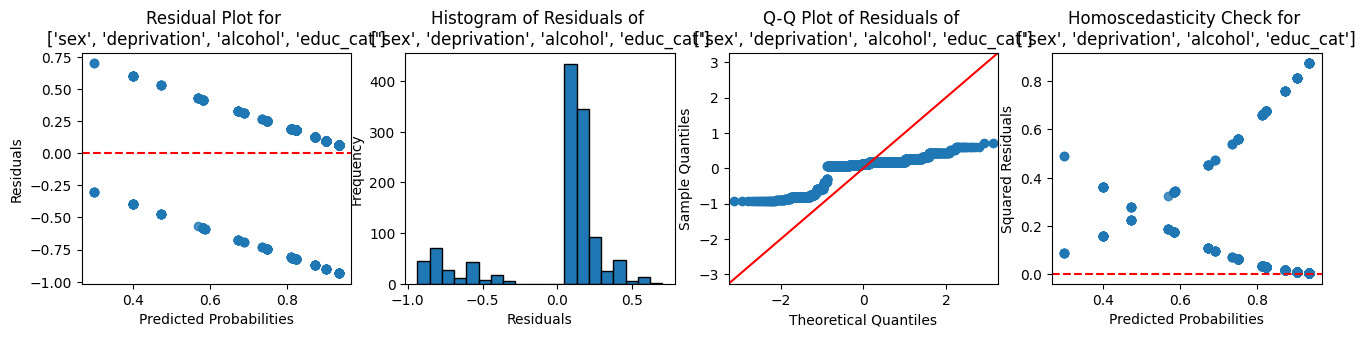

In [14]:
# Analyse seond index
mphd.regression.analyse_model(model = cat_logistic_models[second_index], mode = "logistic_regression", df = df,
                              dependent_variable=dependent_variable[1], round_value=4, data_dictionary=final_data_dictionary)

## Crude Analysis

Crude analysis for sex:
                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.03493
Time:                        21:20:45   Log-Likelihood:                -557.85
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                 2.094e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9755      0.122     16.140      0.000       1.736       2.215
sex           -0.9603      0.155     -6.190      0.000      -1.264      -0.656
The params of the model =
+-

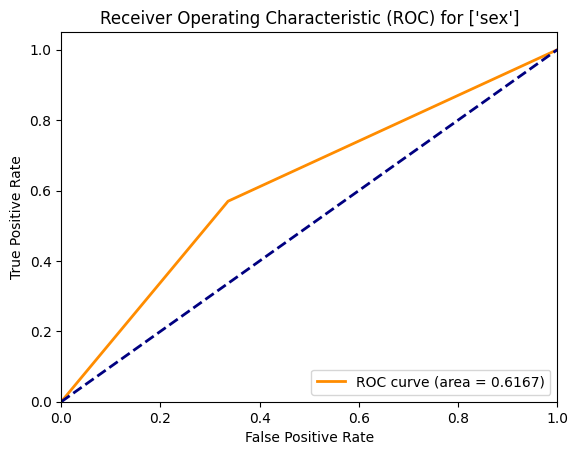

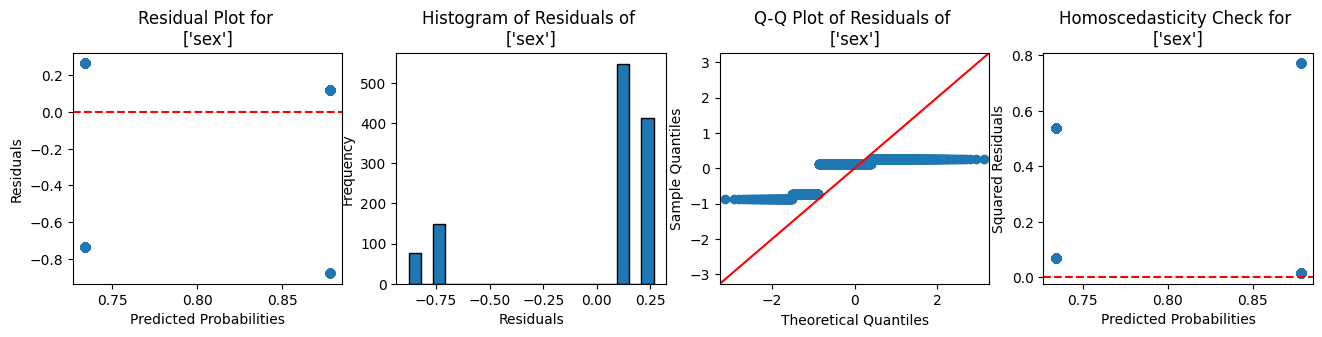

Crude analysis for married:
                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.01678
Time:                        21:20:46   Log-Likelihood:                -568.34
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                 1.059e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6468      0.090     18.283      0.000       1.470       1.823
married       -0.7230      0.161     -4.501      0.000      -1.038      -0.408
The params of the model 

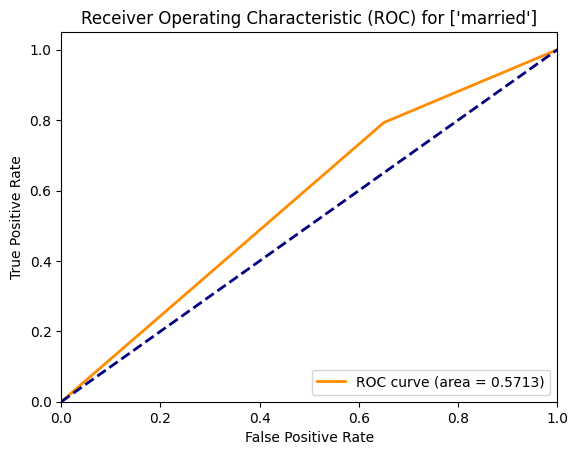

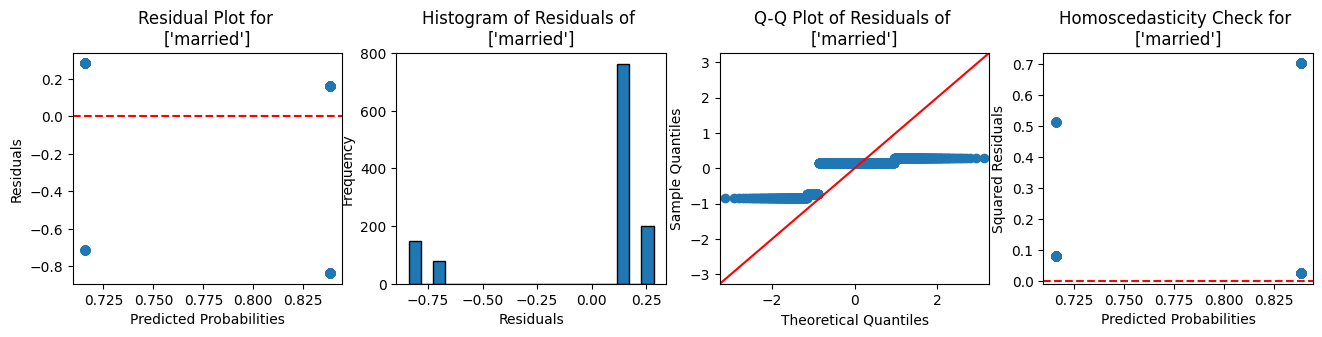

Crude analysis for deprivation:
                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                 0.05275
Time:                        21:20:48   Log-Likelihood:                -547.55
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                 5.755e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7692      0.091     19.487      0.000       1.591       1.947
deprivation    -1.3402      0.167     -8.024      0.000      -1.668      -1.013
The params of th

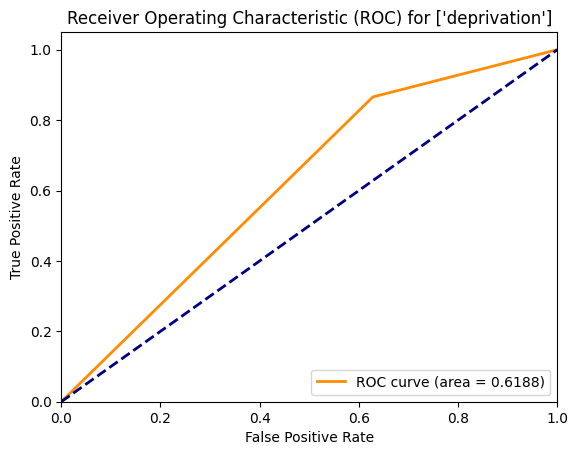

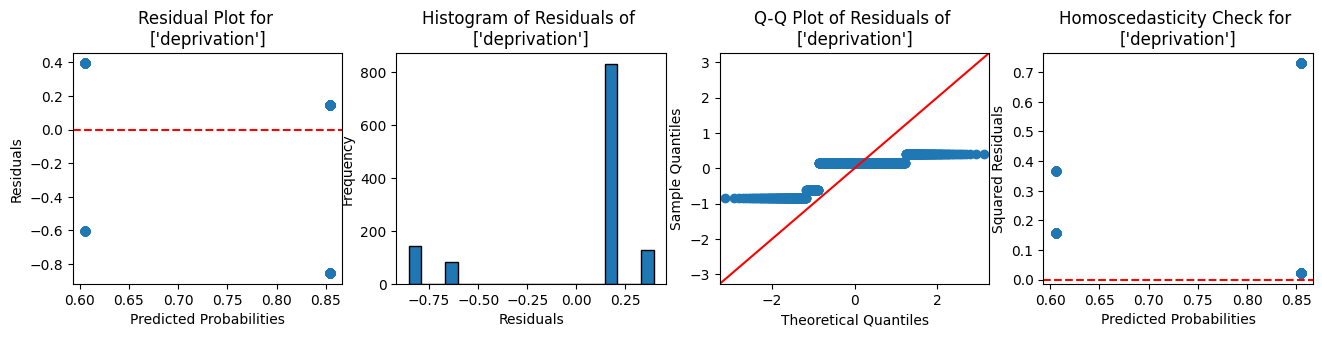

Crude analysis for alcohol:
                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                0.008230
Time:                        21:20:49   Log-Likelihood:                -573.28
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                  0.002039
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5730      0.086     18.220      0.000       1.404       1.742
alcohol       -0.5334      0.169     -3.154      0.002      -0.865      -0.202
The params of the model 

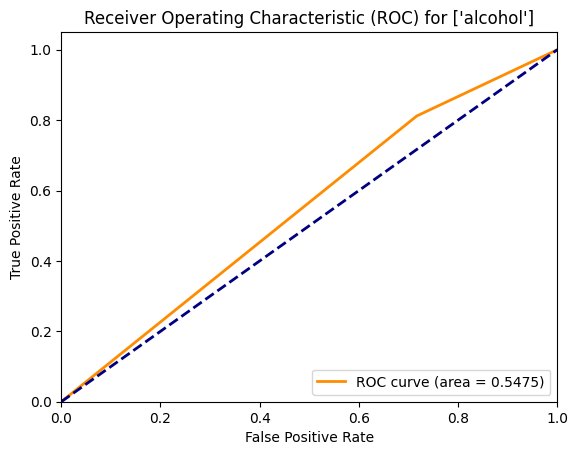

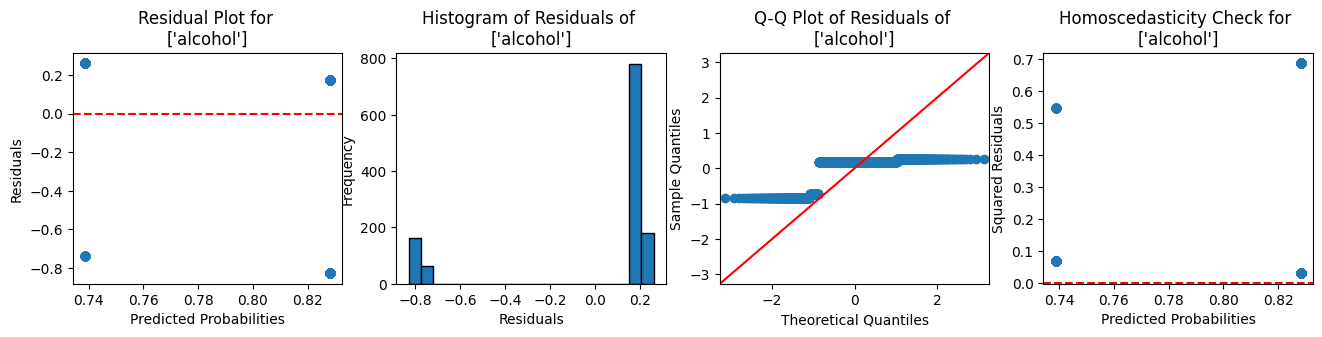

Crude analysis for smoke:
                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:               0.0002573
Time:                        21:20:50   Log-Likelihood:                -577.89
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                    0.5855
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4694      0.084     17.576      0.000       1.306       1.633
smoke         -0.0982      0.179     -0.548      0.583      -0.449       0.253
The params of the model =


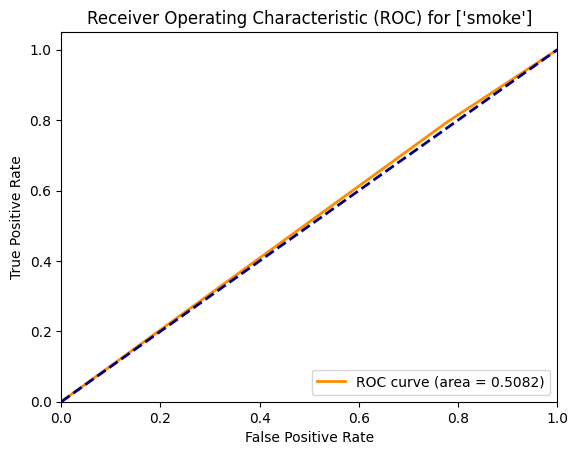

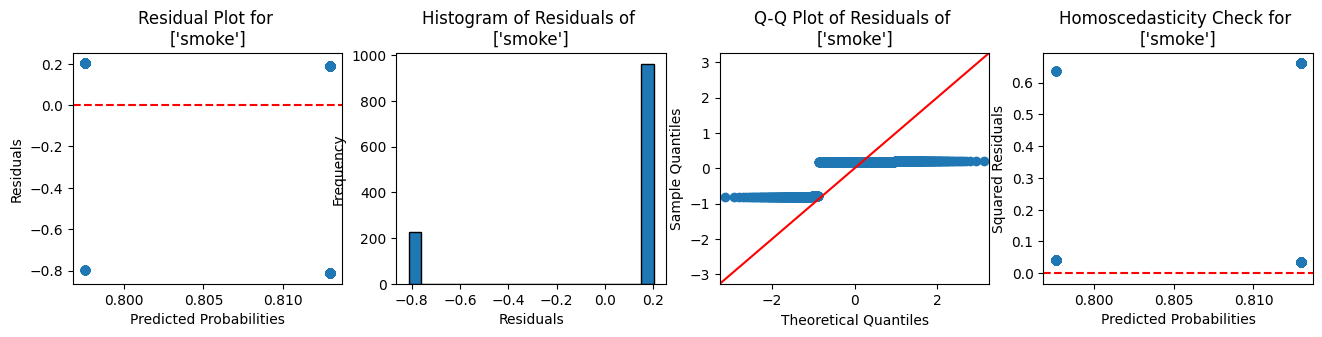

Crude analysis for age_cat:
                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:               0.0008138
Time:                        21:20:51   Log-Likelihood:                -577.57
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                    0.3321
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5084      0.097     15.502      0.000       1.318       1.699
age_cat       -0.1455      0.150     -0.972      0.331      -0.439       0.148
The params of the model 

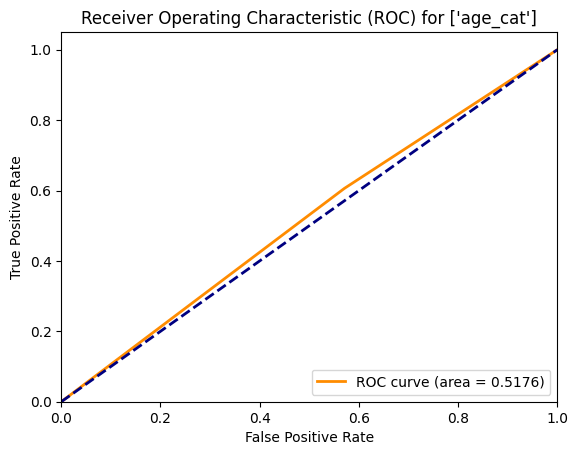

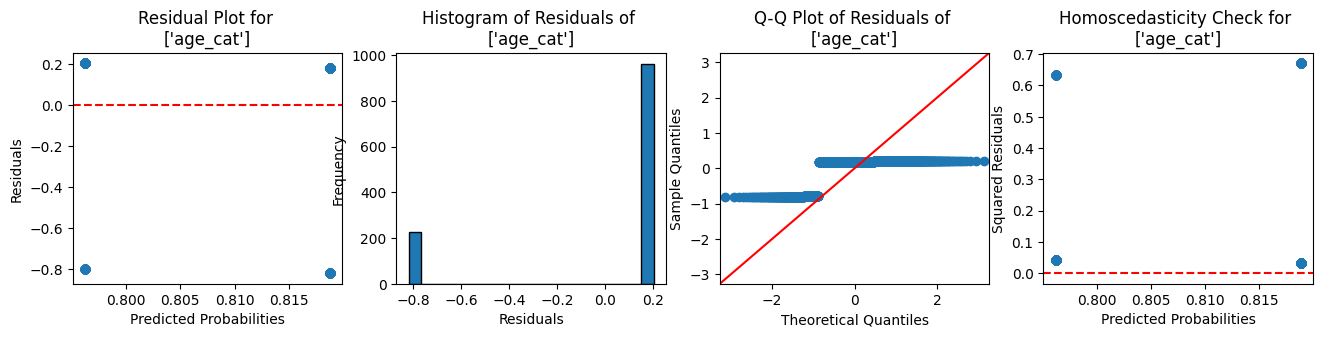

Crude analysis for bmi_cat:
                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                0.002119
Time:                        21:20:52   Log-Likelihood:                -576.81
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                    0.1175
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7193      0.195      8.815      0.000       1.337       2.102
bmi_cat       -0.3215      0.211     -1.525      0.127      -0.735       0.092
The params of the model 

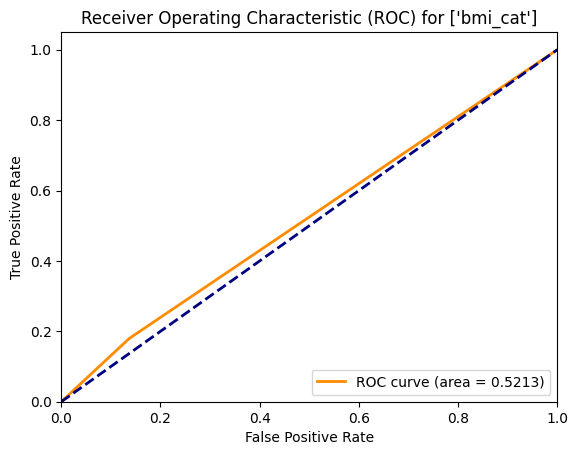

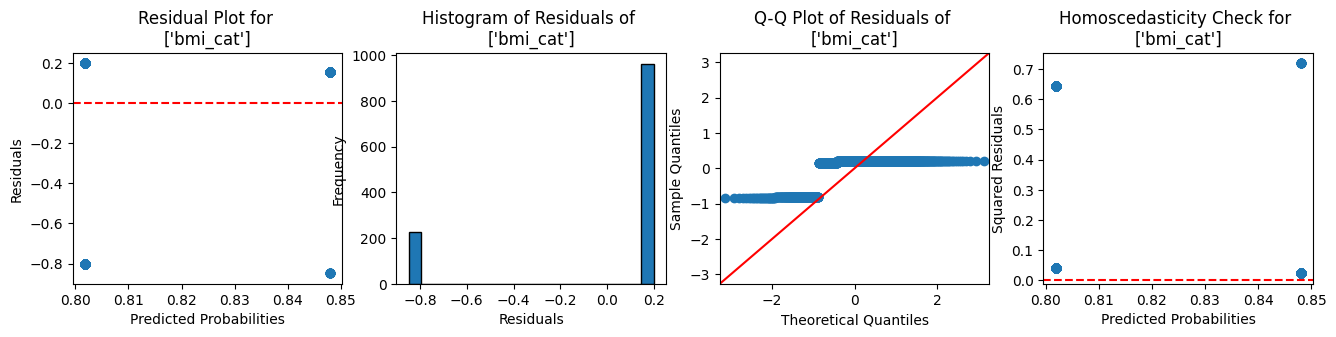

Crude analysis for sbp_cat:
                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:               0.0001069
Time:                        21:20:53   Log-Likelihood:                -577.98
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                    0.7251
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4719      0.100     14.723      0.000       1.276       1.668
sbp_cat       -0.0522      0.148     -0.352      0.725      -0.343       0.239
The params of the model 

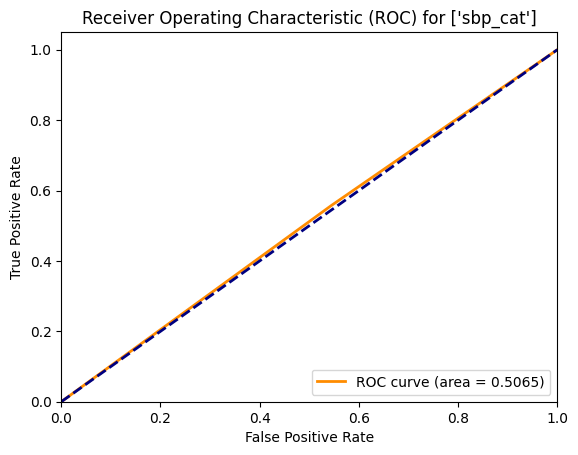

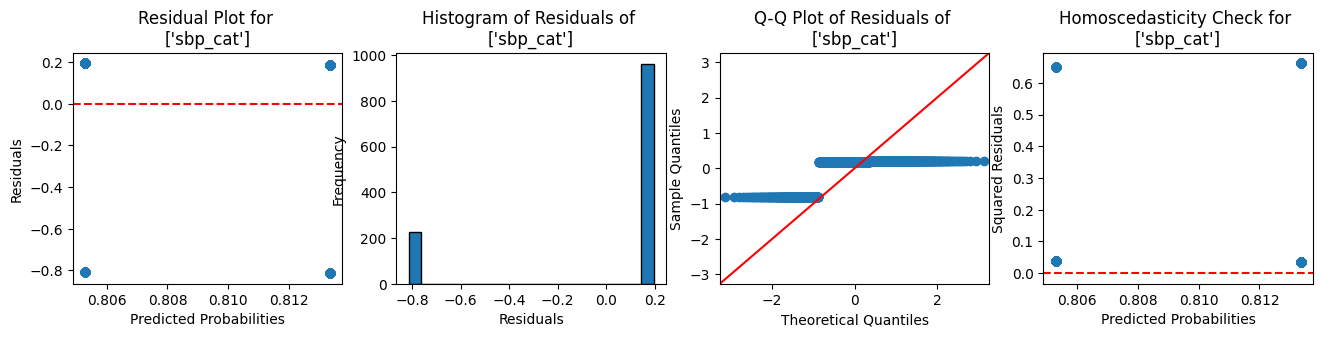

Crude analysis for educ_cat:
                           Logit Regression Results                           
Dep. Variable:              dep_cat_2   No. Observations:                 1188
Model:                          Logit   Df Residuals:                     1186
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:               0.0004980
Time:                        21:20:54   Log-Likelihood:                -577.75
converged:                       True   LL-Null:                       -578.04
Covariance Type:            nonrobust   LLR p-value:                    0.4480
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4864      0.090     16.549      0.000       1.310       1.662
educ_cat      -0.1206      0.158     -0.762      0.446      -0.431       0.190
The params of the model

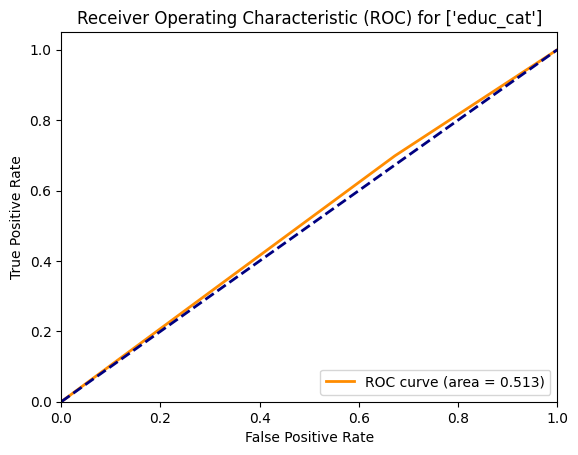

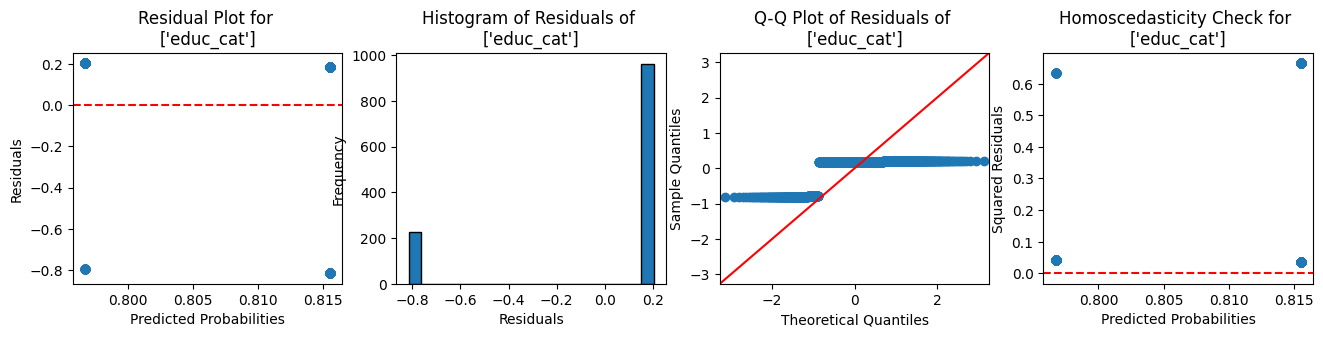

The odds for all independent variables:
+-------------+-------------+---------+-------------+---------+--------+--------+
|             | coefficient | std_err | t_statistic | p_value |  2.5%  | 97.5%  |
+-------------+-------------+---------+-------------+---------+--------+--------+
|     sex     |   0.3828    | 1.1678  |   -6.1904   |   0.0   | 0.2824 | 0.5188 |
|   married   |   0.4853    | 1.1742  |   -4.5013   |   0.0   | 0.3542 | 0.6649 |
| deprivation |   0.2618    | 1.1818  |   -8.0237   |   0.0   | 0.1887 | 0.3632 |
|   alcohol   |   0.5866    | 1.1843  |   -3.1537   | 0.0016  | 0.4211 | 0.8172 |
|    smoke    |   0.9065    | 1.1961  |   -0.5485   | 0.5834  | 0.6382 | 1.2876 |
|   age_cat   |   0.8645    | 1.1615  |   -0.9722   |  0.331  | 0.6447 | 1.1594 |
|   bmi_cat   |    0.725    | 1.2347  |   -1.5254   | 0.1272  | 0.4797 | 1.0959 |
|   sbp_cat   |   0.9491    | 1.1601  |   -0.3518   |  0.725  | 0.7094 | 1.2697 |
|  educ_cat   |   0.8864    | 1.1714  |   -0.7621   |  0.4

In [15]:
crude_params_df, crude_exp_params_df = mphd.regression.crude_analysis(summary_model_df = cat_summary_logistic_models,
                                                                        df = df, mode = "logistic_regression",
                                                                        dependent_variable= dependent_variable[1],
                                                                        data_dictionary = final_data_dictionary,
                                                                        round_value= 4)
# print("The odds for all independent variables:")
# print(crude_exp_params_df.loc[crude_exp_params_df.index != "const"].round(4).to_markdown(tablefmt = "pretty"))

In [19]:
print(cat_summary_logistic_models.loc[(best_index, second_index),].dropna(how = "all", axis = 1).drop(columns = ["model", "formula"])\
      .round(4).transpose().to_markdown(tablefmt = "pretty"))

+-----------------------------------+------------------------------------------+----------------------------------+
|                                   |                   259                    |               154                |
+-----------------------------------+------------------------------------------+----------------------------------+
|             variables             | sex,married,deprivation,alcohol,educ_cat | sex,deprivation,alcohol,educ_cat |
|           num_variables           |                    5                     |                4                 |
|            pseudo_r_2             |                  0.1021                  |              0.0983              |
|          log_likelihood           |                -518.9998                 |            -521.2404             |
|            llr_p_value            |                   0.0                    |               0.0                |
| aic_akaike_information_criterion  |                1049.9997          

Comparing the models:

Pseudo R-squared: Model 259 has a slightly higher pseudo R-squared (0.1021) compared to Model 154 (0.0983), indicating that Model 259 explains a bit more of the variance in the dependent variable. </br>
Log-likelihood, AIC, and BIC: Lower values of log-likelihood, AIC, and BIC indicate a better fit. Model 259 has lower values for these metrics compared to Model 154, suggesting that it provides a better fit to the data. </br>
ROC: Model 259 has a higher ROC value (0.7098) compared to Model 154 (0.703), indicating better discrimination ability. </br>
Lagrange Multiplier and F-statistic: These are measures used in diagnostic tests for model fit. Model 154 has higher values for these metrics, indicating potential issues with fit compared to Model 259. </br>
Considering these metrics, Model 259 appears to be better than Model 154 in terms of overall fit and performance.

In [20]:
# Combining crude and model of choices of exponential coefficients
summary_params_259, summary_exp_params_259 = mphd.regression.generate_adjusted_crude_params(cat_summary_logistic_models, model_index=best_index)
print(summary_exp_params_259.round(4).to_markdown(tablefmt = "pretty"))

+-------------+-------------+---------+--------+--------+-----------------+-------------+----------+-----------+
|             | coefficient | p_value |  2.5%  | 97.5%  | coefficient_adj | p_value_adj | 2.5%_adj | 97.5%_adj |
+-------------+-------------+---------+--------+--------+-----------------+-------------+----------+-----------+
|   alcohol   |   0.5866    | 0.0016  | 0.4211 | 0.8172 |     0.4652      |   0.0001    |  0.3149  |  0.6872   |
|    const    |     nan     |   nan   |  nan   |  nan   |     15.1374     |     0.0     | 10.7166  |  21.3819  |
| deprivation |   0.2618    |   0.0   | 0.1887 | 0.3632 |     0.3088      |     0.0     |  0.2168  |  0.4398   |
|  educ_cat   |   0.8864    |  0.446  | 0.6501 | 1.2087 |     0.6272      |   0.0068    |  0.4474  |  0.8792   |
|   married   |   0.4853    |   0.0   | 0.3542 | 0.6649 |     0.6815      |   0.0329    |  0.4792  |  0.9693   |
|     sex     |   0.3828    |   0.0   | 0.2824 | 0.5188 |     0.3604      |     0.0     |  0.252

## Finding the confounder variables

In [21]:
confounder_summary_table = mphd.regression.find_confounder(cat_summary_logistic_models, fixed_independent_variable="deprivation")

+---+----------------+---------------------------+----------------+----------+
|   | b1_deprivation | b2_variables_deprivation+ | b2_deprivation | b1-b2/b1 |
+---+----------------+---------------------------+----------------+----------+
| 0 |    -1.3402     |            sex            |    -1.2659     |  5.5446  |
| 1 |    -1.3402     |          married          |    -1.2783     |  4.6174  |
| 2 |    -1.3402     |          alcohol          |     -1.29      |  3.743   |
| 3 |    -1.3402     |           smoke           |    -1.3579     |  1.3227  |
| 4 |    -1.3402     |          age_cat          |    -1.3371     |  0.2346  |
| 5 |    -1.3402     |          bmi_cat          |    -1.3627     |  1.6782  |
| 6 |    -1.3402     |          sbp_cat          |    -1.3439     |  0.2759  |
| 7 |    -1.3402     |         educ_cat          |    -1.4015     |  4.5714  |
+---+----------------+---------------------------+----------------+----------+
No confounde factors was found in the model.
The coe

deprivation:
For individual having material deprivation, the odds of having clinically relevant depression is increased by 0.3088 unit, holding all other variables constant.
The confident interval for the deprivation (95%CI = 0.2168, 0.4398) did not include 0 and its p value of 0.0 is less than 0.05, therefore the coefficient of deprivation statiscally significant.

# Conclusion:

Based on the logistic regression analysis, material deprivation, as indicated by the variable "deprivation," appears to be significantly associated with depression. The coefficient for "deprivation" is 0.2618 (p < 0.001), suggesting that individuals experiencing material deprivation are more likely to experience depression compared to those who are not deprived, holding other variables constant. However, the logistic regression also highlighted that the alcohol consumsion, education level (either entered university or not), marital status and sex also statistically significant associated with depression.